<a href="https://colab.research.google.com/github/himanshupandeyy/simplilearn_projects/blob/main/customer_service_rst_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 55)
pd.set_option('display.max_rows', 364558)
import datetime

In [ ]:
cmr_service_df = pd.read_csv("/content/drive/MyDrive/Data science learning/Datasets /simplilear_project_1_python/Project_Two_Dataset/311_Service_Requests_from_2010_to_Present.csv",parse_dates=["Created Date", "Closed Date", "Due Date"] , low_memory =False)

In [ ]:
cmr_service_df.shape

(364558, 53)

# dataset contain 53 columns and 364558 rows.

In [ ]:
len(cmr_service_df.columns)

53

In [ ]:
cmr_service_df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,2016-01-01 07:59:45,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,2016-01-01 07:59:44,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [ ]:
# check null values bcoz many colummns showing NAN. Lets find out, How many null values are present in this dataset ?

In [ ]:
cmr_service_df.isna().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


In [ ]:
# True means has null value in column, False means has not. These are the coumns has null values.

In [ ]:
cmr_service_df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

   # EDA ON DATASET

In [ ]:
cmr_service_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

In [ ]:
cmr_service_df.describe() # to also check numerical columns

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [ ]:
# remove those column which has no value. There are many columns which are not containing any value or maximum null . Better to delete those.

In [ ]:
cmr_service_df.drop(["School or Citywide Complaint", "Vehicle Type" ,"Taxi Company Borough", "Taxi Pick Up Location", "Garage Lot Name" ],axis =1 , inplace =True)

In [ ]:
# Lets check again with description.

In [ ]:
cmr_service_df.describe() 

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,40.912869,-73.700715


In [ ]:
cmr_service_df.shape

(364558, 48)

In [ ]:
# Now there are 48 columns, but it seems there are other non_numeric type columns present,  which are not having any values. Also delete those columns.

In [ ]:
cmr_service_df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,2016-01-01 07:59:45,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,2016-01-01 07:59:44,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [ ]:
cmr_service_df.drop(["Intersection Street 1","Intersection Street 2","Landmark"],axis=1,inplace =True)

In [ ]:
cmr_service_df.shape

(364558, 45)

In [ ]:
# need to check columns more and then delete if required.

In [ ]:
cmr_service_df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Precinct,Closed,2016-01-01 07:59:45,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Precinct,Closed,2016-01-01 07:59:44,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [ ]:
# cmr_service_df["Park Facility Name"][0:25]

In [ ]:
#cmr_service_df["School Name"][0:25]

# Those columns with unspecified values are not giving any insight, better to delete them.

In [ ]:
cmr_service_df.drop(["Park Facility Name","School Name","School Number",	"School Region",	"School Code",	"School Phone Number",	"School Address",	"School City",	"School State",	"School Zip"], axis =1, inplace =True)

In [ ]:
cmr_service_df.shape

(364558, 35)

In [ ]:
# cmr_service_df["Bridge Highway Name"][0:25]

In [ ]:
#cmr_service_df["Ferry Direction"][0:25]

In [ ]:
# These 6 columns related to bridge and ferry has no values. Better to delete.

In [ ]:
cmr_service_df.drop(["School Not Found",	"Bridge Highway Name",	"Bridge Highway Direction",	"Road Ramp",	"Bridge Highway Segment",	"Ferry Direction",	"Ferry Terminal Name"],axis = 1, inplace =True)

In [ ]:
cmr_service_df.shape

(364558, 28)

In [ ]:
# There are now 28 columns. Check null values now after deleting 25 columns

In [ ]:
cmr_service_df.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2381
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         6501
Location Type                       133
Incident Zip                       2998
Incident Address                  51699
Street Name                       51699
Cross Street 1                    57188
Cross Street 2                    57805
Address Type                       3252
City                               2997
Facility Type                      2389
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2402
Community Board                       0
Borough                               0
X Coordinate (State Plane)         4030
Y Coordinate (State Plane)         4030
Park Borough                          0


In [ ]:
# check the percentage of null values in dataset. So that we can decide whether we should delete those rows or do missing value treatment.

In [ ]:
round(cmr_service_df.isnull().sum()/cmr_service_df.shape[0]*100, 2)

Unique Key                         0.00
Created Date                       0.00
Closed Date                        0.65
Agency                             0.00
Agency Name                        0.00
Complaint Type                     0.00
Descriptor                         1.78
Location Type                      0.04
Incident Zip                       0.82
Incident Address                  14.18
Street Name                       14.18
Cross Street 1                    15.69
Cross Street 2                    15.86
Address Type                       0.89
City                               0.82
Facility Type                      0.66
Status                             0.00
Due Date                           0.00
Resolution Description             0.00
Resolution Action Updated Date     0.66
Community Board                    0.00
Borough                            0.00
X Coordinate (State Plane)         1.11
Y Coordinate (State Plane)         1.11
Park Borough                       0.00


In [ ]:
# Nan is less than  20% in any column. So, WE can go for deleting these null rows.

In [ ]:
cmr_service_df.dropna(axis= 0,inplace=True)

In [ ]:
cmr_service_df.shape

(300932, 28)

In [ ]:
cmr_service_df.isna().any()

Unique Key                        False
Created Date                      False
Closed Date                       False
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                        False
Location Type                     False
Incident Zip                      False
Incident Address                  False
Street Name                       False
Cross Street 1                    False
Cross Street 2                    False
Address Type                      False
City                              False
Facility Type                     False
Status                            False
Due Date                          False
Resolution Description            False
Resolution Action Updated Date    False
Community Board                   False
Borough                           False
X Coordinate (State Plane)        False
Y Coordinate (State Plane)        False
Park Borough                      False


In [ ]:
# There is no missing value in dataset

# Now work on date time columns to get request closing time and other complain types

In [ ]:
cmr_service_df["Request_Closing_Time"] = cmr_service_df["Closed Date"] - cmr_service_df["Created Date"]

In [ ]:
cmr_service_df.head() # we have a new column

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Precinct,Closed,2016-01-01 07:59:45,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Precinct,Closed,2016-01-01 07:59:44,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,BRONX,Precinct,Closed,2016-01-01 07:59:29,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,BRONX,Precinct,Closed,2016-01-01 07:57:46,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,ELMHURST,Precinct,Closed,2016-01-01 07:56:58,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44


# Now Doing EDA and focus on various complains.

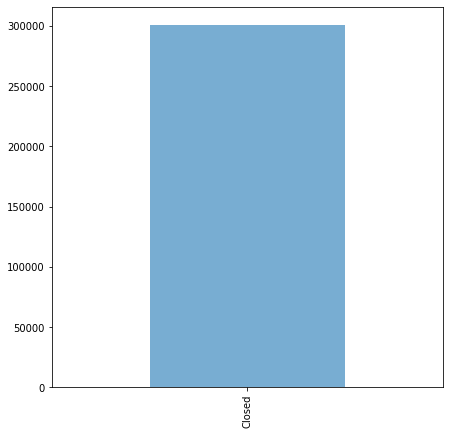

In [ ]:
#Have a look at the status of tickets
cmr_service_df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

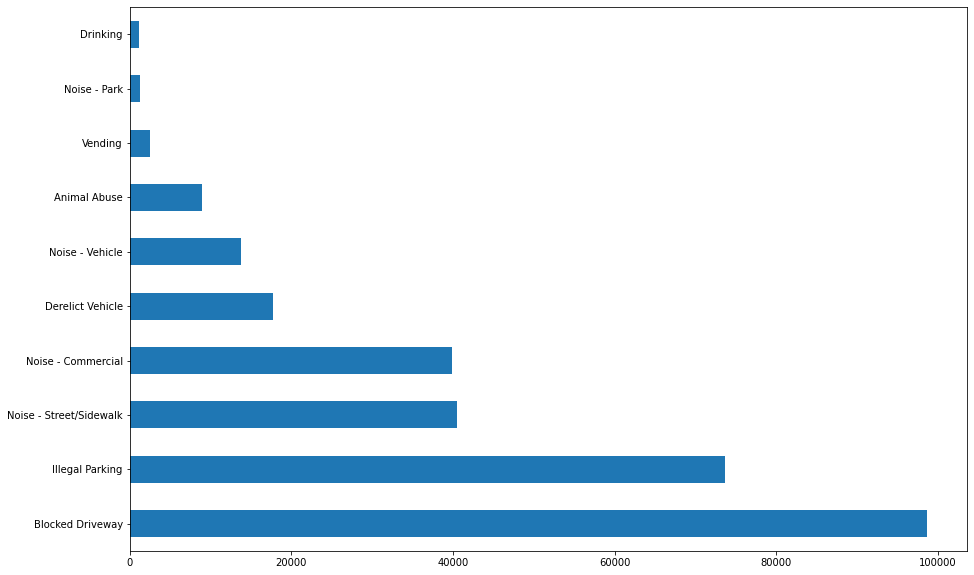

In [ ]:
#Complaint type Breakdown with bar plot to figure out majority of complaint types and top 10 complaints
cmr_service_df['Complaint Type'].value_counts().head(10).plot(kind='barh',figsize=(15,10));

In [ ]:
cmr_service_df.groupby(["Borough","Complaint Type","Descriptor"]).size()

Borough        Complaint Type            Descriptor                    
BRONX          Animal Abuse              Chained                             130
                                         In Car                               21
                                         Neglected                           863
                                         No Shelter                          146
                                         Other (complaint details)           373
                                         Tortured                            209
               Blocked Driveway          No Access                         13155
                                         Partial Access                     3634
               Derelict Vehicle          With License Plate                 1960
               Disorderly Youth          Nuisance/Truant                       3
                                         Playing in Unsuitable Place          47
               Drinking              

# Find out major complains

In [ ]:
majorcomplints= cmr_service_df.dropna(subset=["Complaint Type"])
majorcomplints= cmr_service_df.groupby("Complaint Type")

sortedComplaintType = majorcomplints.size().sort_values(ascending = False)
sortedComplaintType = sortedComplaintType.to_frame('count').reset_index()

sortedComplaintType
sortedComplaintType.head(10)

,Complaint Type,count
0,Blocked Driveway,98668
1,Illegal Parking,73719
2,Noise - Street/Sidewalk,40444
3,Noise - Commercial,39919
4,Derelict Vehicle,17706
5,Noise - Vehicle,13763
6,Animal Abuse,8968
7,Vending,2451
8,Noise - Park,1289
9,Drinking,1124


In [ ]:
com_names = sortedComplaintType[0:10].value_counts().index


In [ ]:
com_value = sortedComplaintType[0:10].value_counts()

([<matplotlib.patches.Wedge at 0x7faca03b5dd0>,
 [Text(1.0461621663333946, 0.3399186987098808, "('Animal Abuse', 8968)"),
  Text(0.6465637650236903, 0.8899187028927925, "('Blocked Driveway', 98668)"),
  Text(-2.5747358111484753e-08, 1.0999999999999999, "('Derelict Vehicle', 17706)"),
  Text(-0.6465638066837905, 0.8899186726249574, "('Drinking', 1124)"),
  Text(-1.0461621822461362, 0.3399186497354952, "('Illegal Parking', 73719)"),
  Text(-1.0461621504206509, -0.33991874768426583, "('Noise - Commercial', 39919)"),
  Text(-0.6465637233635886, -0.8899187331606258, "('Noise - Park', 1289)"),
  Text(7.724207457870327e-08, -1.0999999999999974, "('Noise - Street/Sidewalk', 40444)"),
  Text(0.6465638483438898, -0.88991864235712, "('Noise - Vehicle', 13763)"),
  Text(1.0461621981588753, -0.33991860076110864, "('Vending', 2451)")])

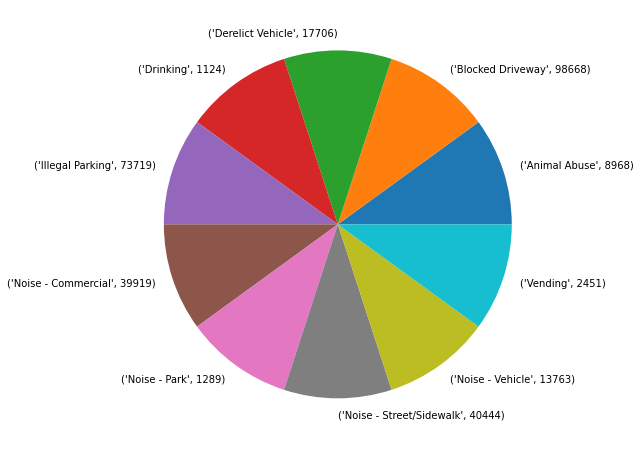

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(com_value, labels = com_names)

In [ ]:
# find out other complains ratio

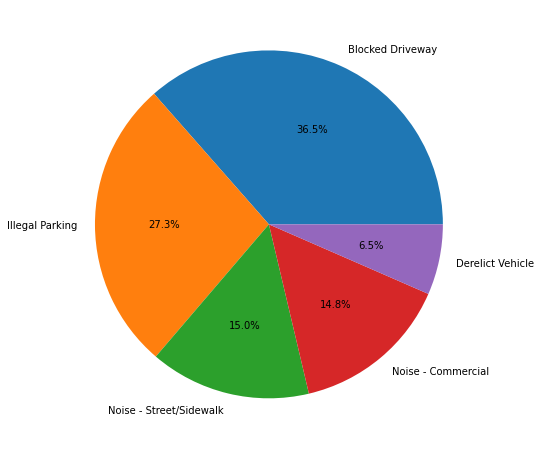

In [ ]:
sortedComplaintType = sortedComplaintType.head()
plt.figure(figsize=(10,8))
plt.pie(sortedComplaintType['count'],labels=sortedComplaintType["Complaint Type"], autopct="%1.1f%%")
plt.show()

In [ ]:
#Group dataset by complaint type to display plot against city
groupedby_complainttype = cmr_service_df.groupby('Complaint Type')
grp_data = groupedby_complainttype.get_group('Blocked Driveway')
grp_data.shape

(98668, 29)

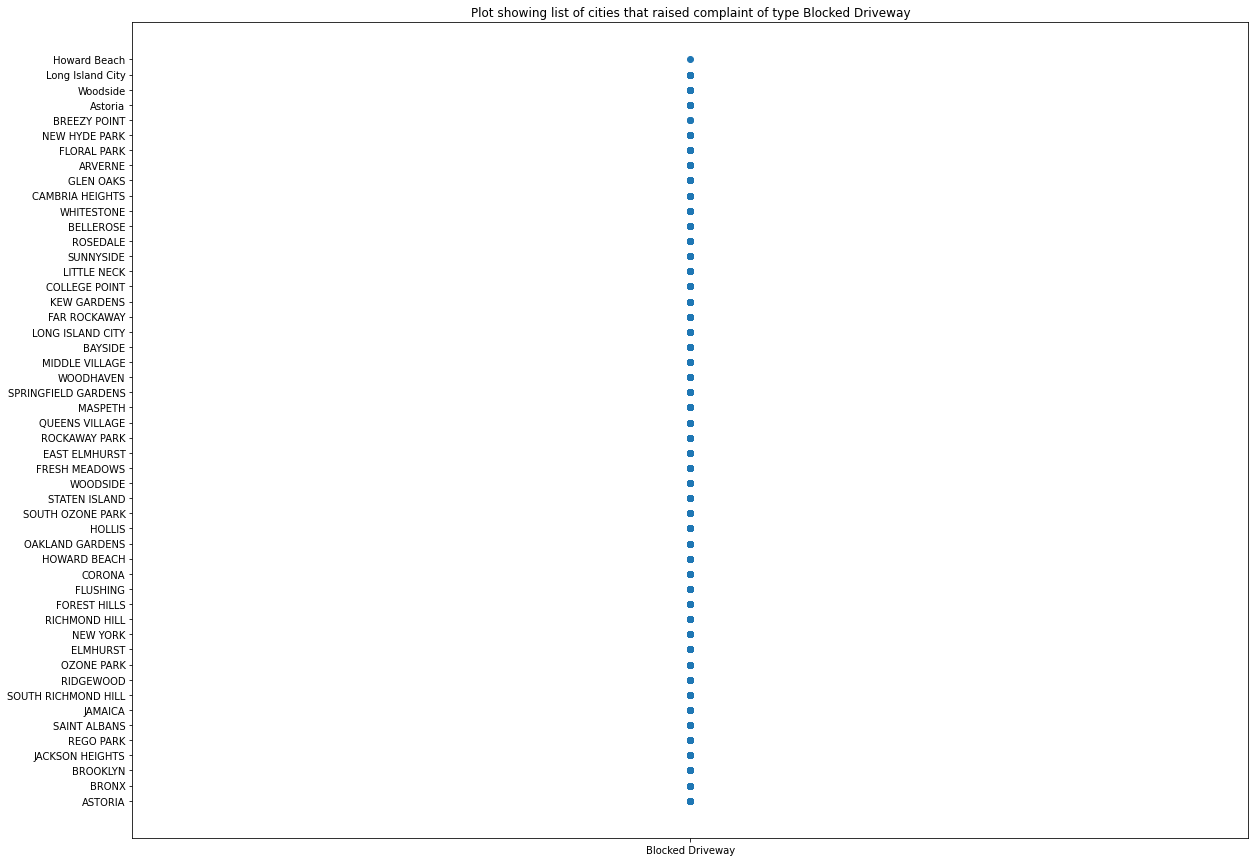

In [ ]:
#Scatter plot displaying all the cities that raised complaint of type 'Blocked Driveway'
plt.figure(figsize=(20, 15))
plt.scatter(grp_data['Complaint Type'],grp_data['City'])
plt.title('Plot showing list of cities that raised complaint of type Blocked Driveway')
plt.show()

In [ ]:
# last to to find is average response time across various types of complaints

In [ ]:
cmr_service_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Borough', 'Latitude', 'Longitude',
       'Location', 'Request_Closing_Time'],
      dtype='object')

In [ ]:
average_response = cmr_service_df.groupby("Complaint Type")["Request_Closing_Time"].mean()

In [ ]:
average_response

Complaint Type
Animal Abuse               0 days 05:07:13.403768956
Blocked Driveway           0 days 04:30:23.492976446
Derelict Vehicle           0 days 06:55:46.709702925
Disorderly Youth              0 days 03:30:04.437500
Drinking                   0 days 03:49:30.193950177
Graffiti                   0 days 05:30:59.239130434
Illegal Parking            0 days 04:19:49.203760224
Noise - Commercial         0 days 03:03:31.378817104
Noise - House of Worship   0 days 03:15:03.053549190
Noise - Park               0 days 03:30:10.229635376
Noise - Street/Sidewalk    0 days 03:26:08.929606369
Noise - Vehicle            0 days 03:35:19.553149749
Posting Advertisement      0 days 01:55:50.075968992
Traffic                    0 days 03:47:33.763569457
Vending                    0 days 03:56:29.044879640
Name: Request_Closing_Time, dtype: timedelta64[ns]

# we can see average respone time now

In [ ]:
average_response.mean()

Timedelta('0 days 04:00:55.513997669')